In [3]:
# base packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn necessities and metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import partial_dependence, plot_partial_dependence

# ensemble methods
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, plot_tree, plot_importance, to_graphviz

# dimensionality reduction
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import umap

# unsupervised learning
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import hdbscan

# visualizations
import graphviz
from sklearn.tree import plot_tree

In [4]:
df = pd.read_json('data/data.json')

In [5]:
df['fraud'] = np.where(df['acct_type'].str.contains('fraud'), 1, 0)
df = df.select_dtypes(exclude=['object'])

In [6]:
# remove all rows where fraud column = null

In [7]:
y = df.pop('fraud')
X = df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [9]:
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_df = imputer.fit_transform(df)

In [10]:
standardized_df = StandardScaler().fit_transform(imputed_df)
min_max_df = MinMaxScaler().fit_transform(imputed_df)
robust_df = RobustScaler().fit_transform(imputed_df)

Dimension Reduction Testing w/ different Scalers

Standardized Scaler

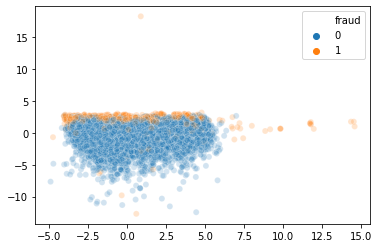

In [11]:
# PCA
comp = 21
pca_standard = PCA(n_components=comp, random_state=42)
pca_result = pca_standard.fit_transform(standardized_df)

sns.scatterplot(pca_result[:,0], pca_result[:,1],
                hue=y, alpha=0.2, legend='full')

In [12]:
print ('Variance explained per principal component: {}'.format(pca_standard.explained_variance_ratio_))
print(f'Total variance explained by {comp} components: {sum(pca_standard.explained_variance_ratio_)}')

Variance explained per principal component: [0.19888948 0.09861803 0.07202261 0.06067056 0.05729951 0.05504895
 0.05447745 0.04207389 0.03666409 0.03512684 0.03489761 0.03318647
 0.03204505 0.03137683 0.03018363 0.0289461  0.02687646 0.02134496
 0.01784346 0.01345175 0.0130049 ]
Total variance explained by 21 components: 0.9940486333820715


/home/alex/anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/alex/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", li

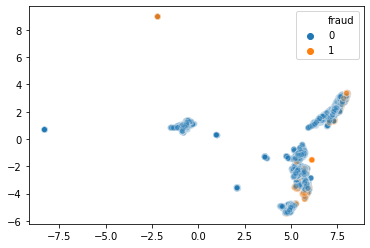

In [13]:
# UMAP
comp=50
standard_embedding = umap.UMAP(n_components = comp, random_state=42)
umap_results = standard_embedding.fit_transform(standardized_df)
sns.scatterplot(umap_results[:,0], umap_results[:,1],
                hue=y, alpha=0.25, legend='full')

/home/alex/anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/alex/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


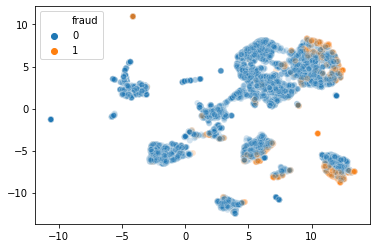

In [23]:
# PCA -> UMAP
standard_embedding_pca = umap.UMAP(random_state=42).fit_transform(pca)
sns.scatterplot(standard_embedding_pca[:,0], standard_embedding_pca[:,1],
            hue=y, alpha=0.2,
            legend='brief')

MinMax Scaler

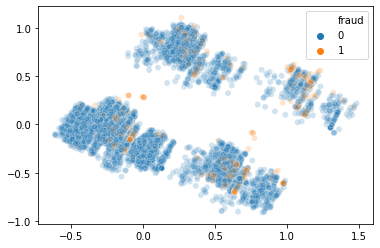

In [7]:
# PCA
pca = PCA(random_state=42).fit_transform(min_max_df)
sns.scatterplot(pca[:,0], pca[:,1],
                hue=y, alpha=0.2, legend='full')

/home/alex/anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/alex/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", li

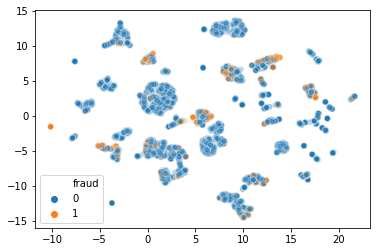

In [8]:
# UMAP
standard_embedding = umap.UMAP(random_state=42).fit_transform(min_max_df)
sns.scatterplot(standard_embedding[:,0], standard_embedding[:,1],
                hue=y, alpha=0.25, legend='full')

/home/alex/anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/alex/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


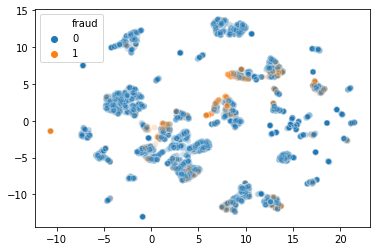

In [9]:
# PCA -> UMAP
standard_embedding_pca = umap.UMAP(random_state=42).fit_transform(pca)
sns.scatterplot(standard_embedding_pca[:,0], standard_embedding_pca[:,1],
            hue=y, alpha=0.2,
            legend='brief')

Robust Scaler

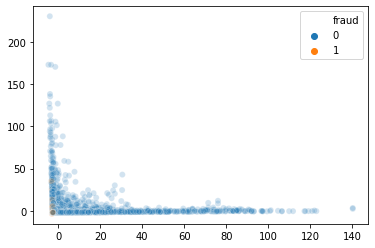

In [10]:
# PCA
pca = PCA(random_state=42).fit_transform(robust_df)
sns.scatterplot(pca[:,0], pca[:,1],
                hue=y, alpha=0.2, legend='full')

/home/alex/anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/alex/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


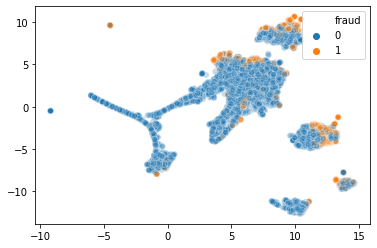

In [11]:
# UMAP
standard_embedding = umap.UMAP(random_state=42).fit_transform(robust_df)
sns.scatterplot(standard_embedding[:,0], standard_embedding[:,1],
                hue=y, alpha=0.25, legend='full')